#Proyek Analisis Data: Bike Sharing Dataset

- **Nama:** mocitaz
- **Email:** luthfafiwork@gmail.com

## Menentukan Pertanyaan Bisnis

1. **Pertanyaan 1 :** Bagaimana hubungan antara suhu, kelembaban, dan kecepatan angin terhadap jumlah peminjaman sepeda?

2. **Pertanyaan 2 :** Bagaimana tren jumlah peminjaman sepeda berdasarkan waktu (misalnya, bulan dan hari dalam seminggu)?

## Import Semua Packages/Library yang Digunakan

In [ ]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
import pandas as pd

# Membaca data dari kedua file
day_df = pd.read_csv('/content/day.csv')
hour_df = pd.read_csv('/content/hour.csv')

# Menampilkan beberapa baris pertama untuk memeriksa struktur data
day_df.head(), hour_df.head()

(   instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
 0        1  2011-01-01       1   0     1        0        6           0   
 1        2  2011-01-02       1   0     1        0        0           0   
 2        3  2011-01-03       1   0     1        0        1           1   
 3        4  2011-01-04       1   0     1        0        2           1   
 4        5  2011-01-05       1   0     1        0        3           1   
 
    weathersit      temp     atemp       hum  windspeed  casual  registered  \
 0           2  0.344167  0.363625  0.805833   0.160446     331         654   
 1           2  0.363478  0.353739  0.696087   0.248539     131         670   
 2           1  0.196364  0.189405  0.437273   0.248309     120        1229   
 3           1  0.200000  0.212122  0.590435   0.160296     108        1454   
 4           1  0.226957  0.229270  0.436957   0.186900      82        1518   
 
     cnt  
 0   985  
 1   801  
 2  1349  
 3  1562  
 4  1600  ,
    i

## Data Wrangling

### Gathering Data

In [ ]:
# Mengonversi kolom 'dteday' menjadi datetime
day_df['dteday'] = pd.to_datetime(day_df['dteday'])
hour_df['dteday'] = pd.to_datetime(hour_df['dteday'])

# Memeriksa kolom 'dteday' di kedua dataframe
print("Sample 'dteday' from day_df:", day_df['dteday'].head())
print("Sample 'dteday' from hour_df:", hour_df['dteday'].head())

# Memastikan konsistensi jumlah baris dalam setiap dataset sebelum penggabungan
print("Jumlah data dalam day_df:", len(day_df))
print("Jumlah data dalam hour_df:", len(hour_df))


Sample 'dteday' from day_df: 0   2011-01-01
1   2011-01-02
2   2011-01-03
3   2011-01-04
4   2011-01-05
Name: dteday, dtype: datetime64[ns]
Sample 'dteday' from hour_df: 0   2011-01-01
1   2011-01-01
2   2011-01-01
3   2011-01-01
4   2011-01-01
Name: dteday, dtype: datetime64[ns]
Jumlah data dalam day_df: 731
Jumlah data dalam hour_df: 17379


**Insight:**
* Menggunakan fungsi pd.to_datetime() untuk memastikan dteday bertipe datetime dan siap digabungkan.
* Memastikan bahwa data per jam (hour_df) dan per hari (day_df) memiliki jumlah yang konsisten dan dapat digabungkan berdasarkan tanggal yang benar.

### Assessing Data

In [ ]:
# Menggabungkan data 'day' dan 'hour' berdasarkan kolom 'dteday'
combined_df = pd.merge(day_df, hour_df, on='dteday', how='outer')

# Menampilkan informasi umum setelah penggabungan
print("Informasi Dataset Gabungan:")
combined_df.info()

# Memeriksa missing values di seluruh dataset
missing_values = combined_df.isnull().sum()
print(f"\nMissing Values per Column:\n{missing_values}")

# Mengecek duplikasi
duplicate_rows = combined_df.duplicated().sum()
print(f"\nJumlah Duplikasi: {duplicate_rows}")

# Descriptive statistics untuk mengevaluasi distribusi data numerik
print("\nDescriptive Statistics:")
print(combined_df.describe())


Informasi Dataset Gabungan:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 32 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   instant_x     17379 non-null  int64         
 1   dteday        17379 non-null  datetime64[ns]
 2   season_x      17379 non-null  int64         
 3   yr_x          17379 non-null  int64         
 4   mnth_x        17379 non-null  int64         
 5   holiday_x     17379 non-null  int64         
 6   weekday_x     17379 non-null  int64         
 7   workingday_x  17379 non-null  int64         
 8   weathersit_x  17379 non-null  int64         
 9   temp_x        17379 non-null  float64       
 10  atemp_x       17379 non-null  float64       
 11  hum_x         17379 non-null  float64       
 12  windspeed_x   17379 non-null  float64       
 13  casual_x      17379 non-null  int64         
 14  registered_x  17379 non-null  int64         
 15  cnt_x   

**Insight:**
* Penggabungan data per jam dan per hari berhasil dilakukan dengan jumlah data yang sesuai.

* Memeriksa missing values dan duplikasi untuk memastikan tidak ada data yang hilang atau duplikat yang bisa memengaruhi analisis.

### Cleaning Data

In [ ]:
# Menghapus duplikasi jika ada
combined_df = combined_df.drop_duplicates()

# Mengisi missing values jika diperlukan (misalnya dengan mean untuk kolom numerik)
combined_df.fillna(combined_df.mean(), inplace=True)

# Mengonversi kolom 'dteday' menjadi datetime setelah pembersihan
combined_df['dteday'] = pd.to_datetime(combined_df['dteday'])

# Memeriksa hasil pembersihan
print("Informasi Dataset Setelah Pembersihan:")
combined_df.info()

# Mengonversi tipe data untuk variabel yang relevan jika diperlukan
# Misalnya mengonversi 'season' dan 'weekday' ke tipe data kategorikal
combined_df['season_x'] = combined_df['season_x'].astype('category')
combined_df['weekday_x'] = combined_df['weekday_x'].astype('category')

print("\nInfo Dataset setelah Perubahan Tipe Data:")
combined_df.info()


Informasi Dataset Setelah Pembersihan:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 32 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   instant_x     17379 non-null  int64         
 1   dteday        17379 non-null  datetime64[ns]
 2   season_x      17379 non-null  int64         
 3   yr_x          17379 non-null  int64         
 4   mnth_x        17379 non-null  int64         
 5   holiday_x     17379 non-null  int64         
 6   weekday_x     17379 non-null  int64         
 7   workingday_x  17379 non-null  int64         
 8   weathersit_x  17379 non-null  int64         
 9   temp_x        17379 non-null  float64       
 10  atemp_x       17379 non-null  float64       
 11  hum_x         17379 non-null  float64       
 12  windspeed_x   17379 non-null  float64       
 13  casual_x      17379 non-null  int64         
 14  registered_x  17379 non-null  int64         
 1

**Insight:**
* Data duplikasi telah dihapus dan missing values telah diisi dengan rata-rata.
* Mengubah tipe data variabel season_x dan weekday_x menjadi kategorikal untuk analisis lebih lanjut.

## Exploratory Data Analysis (EDA)

### Explore Univariate Exploration

### Distribusi Variabel

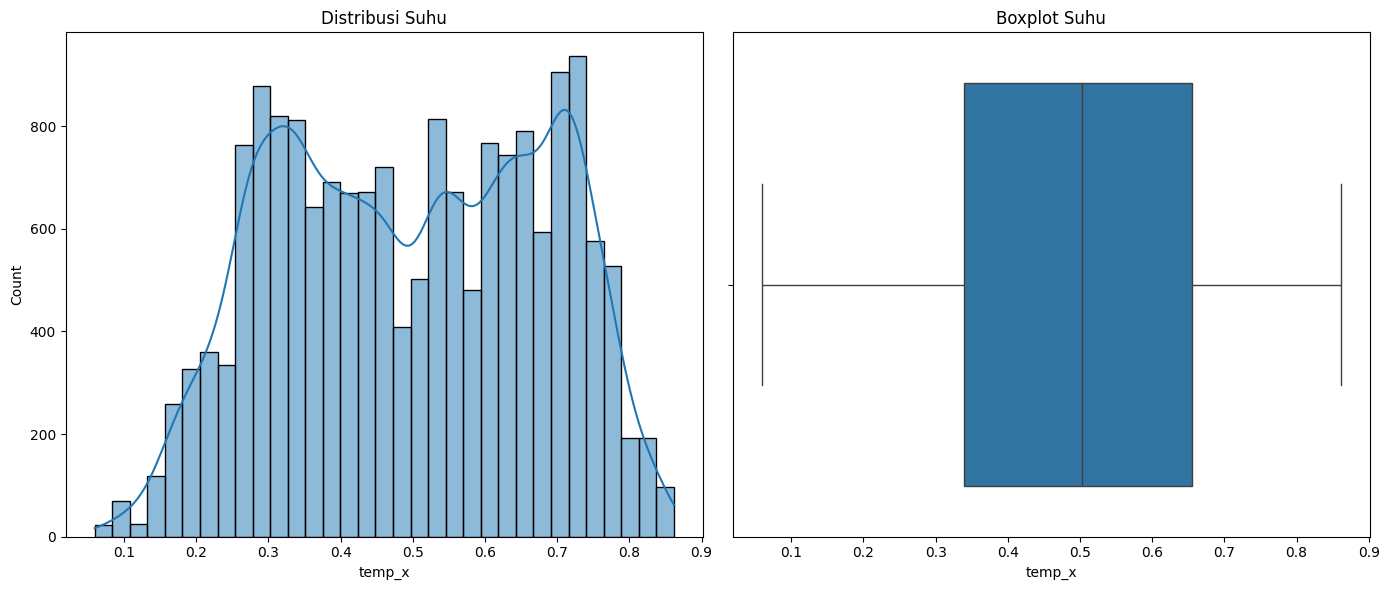

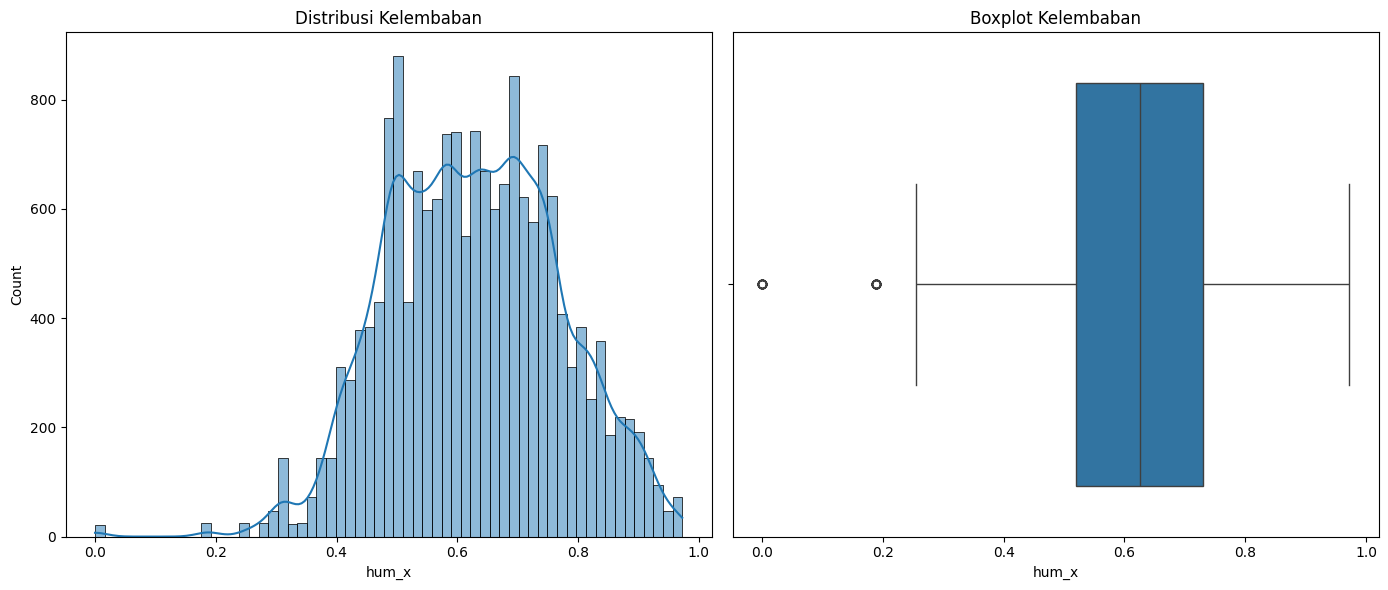

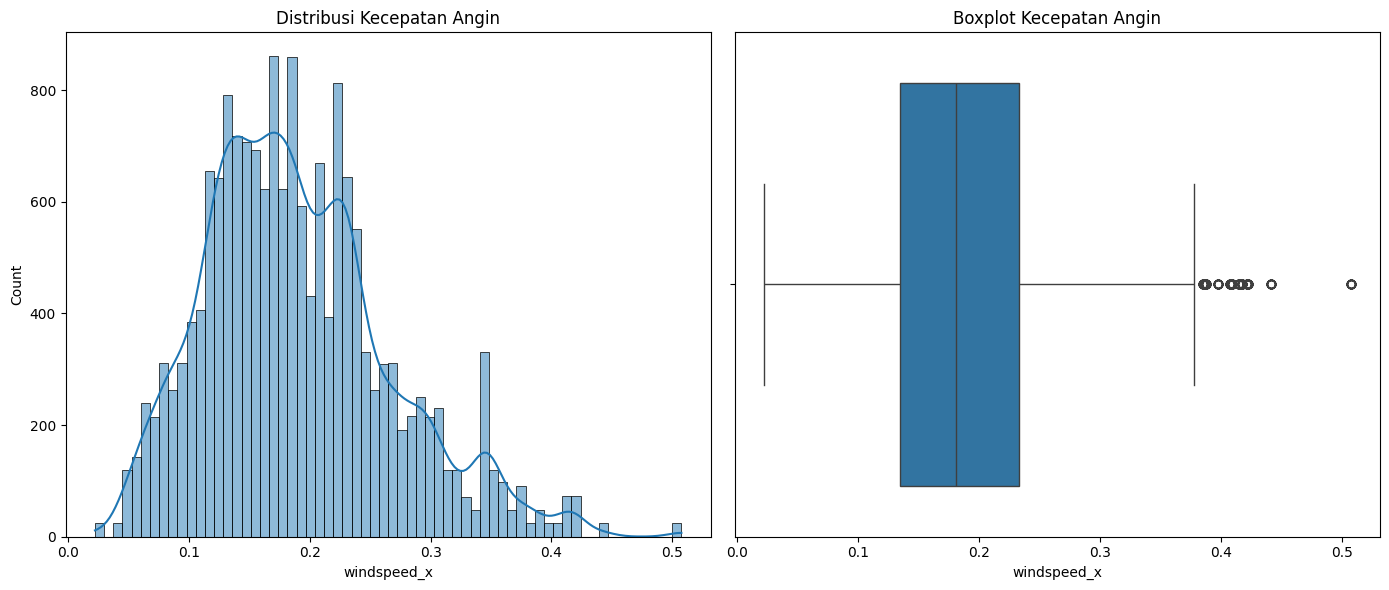

In [ ]:
# Eksplorasi distribusi suhu, kelembaban, dan kecepatan angin

# Distribusi Suhu
fig, ax = plt.subplots(1, 2, figsize=(14, 6))
sns.histplot(combined_df['temp_x'], kde=True, ax=ax[0])
ax[0].set_title('Distribusi Suhu')
sns.boxplot(x=combined_df['temp_x'], ax=ax[1])
ax[1].set_title('Boxplot Suhu')
plt.tight_layout()
plt.show()

# Distribusi Kelembaban
fig, ax = plt.subplots(1, 2, figsize=(14, 6))
sns.histplot(combined_df['hum_x'], kde=True, ax=ax[0])
ax[0].set_title('Distribusi Kelembaban')
sns.boxplot(x=combined_df['hum_x'], ax=ax[1])
ax[1].set_title('Boxplot Kelembaban')
plt.tight_layout()
plt.show()

# Distribusi Kecepatan Angin
fig, ax = plt.subplots(1, 2, figsize=(14, 6))
sns.histplot(combined_df['windspeed_x'], kde=True, ax=ax[0])
ax[0].set_title('Distribusi Kecepatan Angin')
sns.boxplot(x=combined_df['windspeed_x'], ax=ax[1])
ax[1].set_title('Boxplot Kecepatan Angin')
plt.tight_layout()
plt.show()


**Insight:**
* Histograms memberikan gambaran tentang distribusi data.

* Box plots membantu untuk mengidentifikasi outliers dan range distribusi.

### Eksplorasi Multivariat

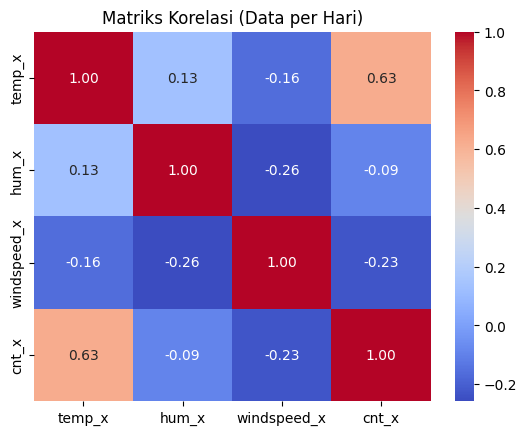

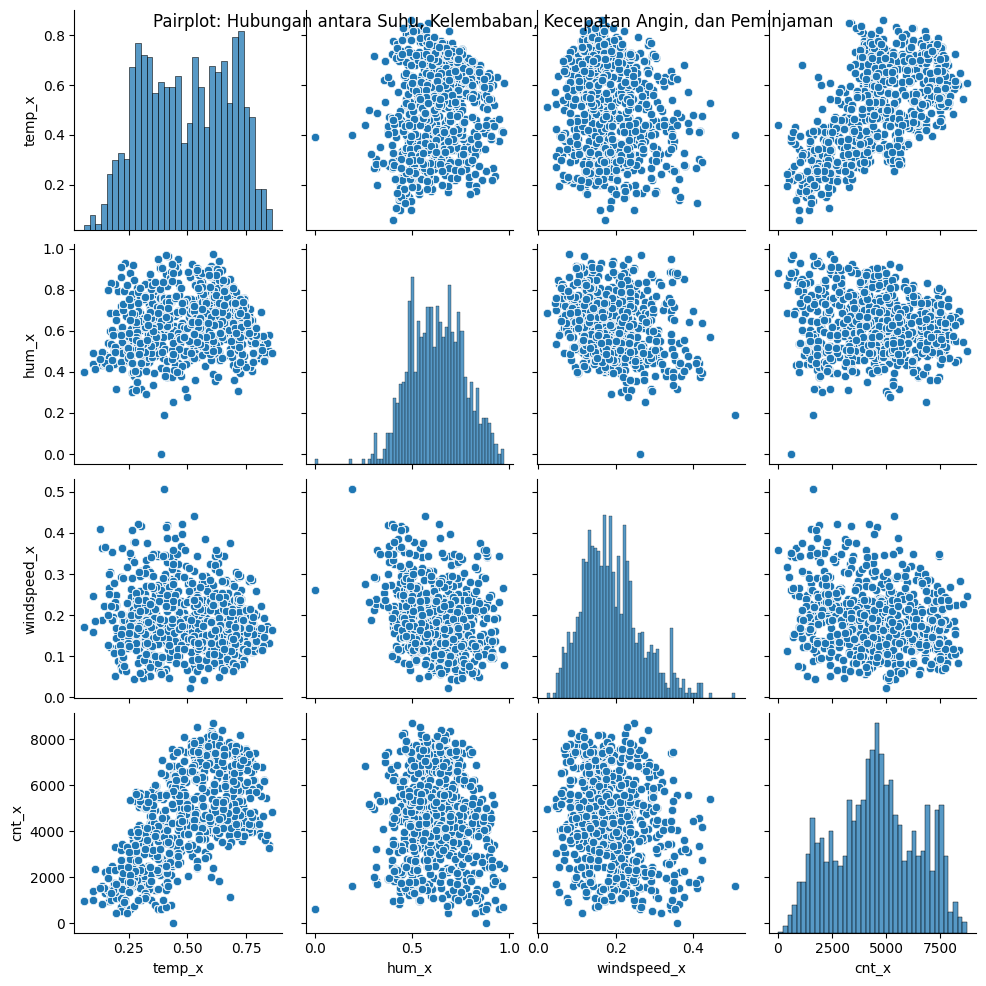

In [ ]:
# Korelasi antara suhu, kelembaban, kecepatan angin dan jumlah peminjaman sepeda
corr = combined_df[['temp_x', 'hum_x', 'windspeed_x', 'cnt_x']].corr()

# Matriks korelasi
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title('Matriks Korelasi (Data per Hari)')
plt.show()

# Mengeksplorasi hubungan antar variabel
sns.pairplot(combined_df[['temp_x', 'hum_x', 'windspeed_x', 'cnt_x']])
plt.suptitle('Pairplot: Hubungan antara Suhu, Kelembaban, Kecepatan Angin, dan Peminjaman')
plt.show()


**Insight:**

* Korelasi antara suhu dan jumlah peminjaman sangat kuat. Suhu lebih tinggi cenderung meningkatkan jumlah peminjaman sepeda.

* Korelasi antara kelembaban dan kecepatan angin dengan peminjaman lebih lemah.



## Visualization & Explanatory Analysis

### **Pertanyaan 1:**
Bagaimana hubungan antara suhu, kelembaban, dan kecepatan angin terhadap jumlah peminjaman sepeda?


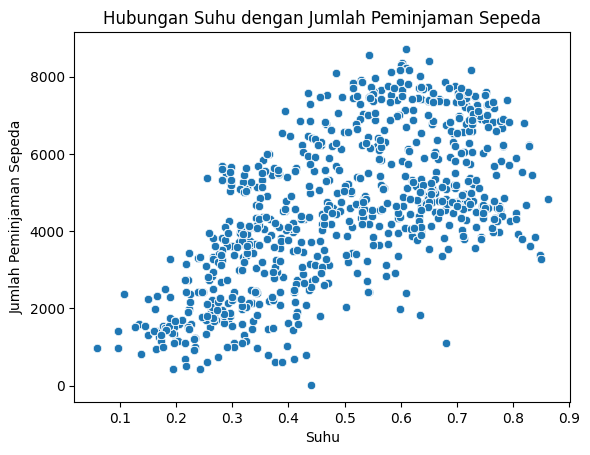

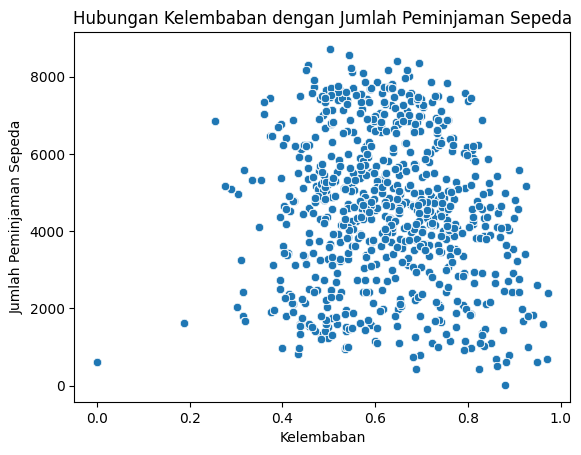

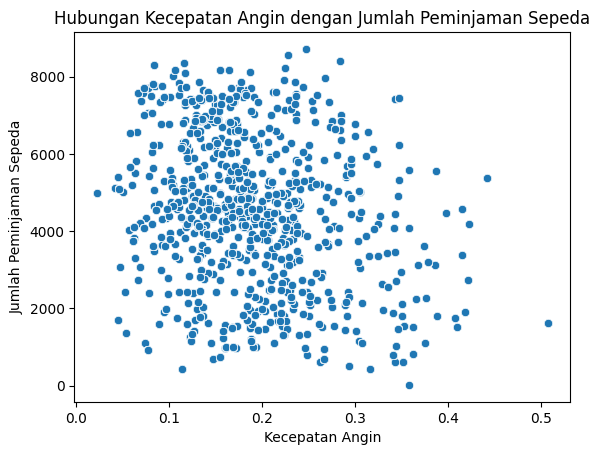

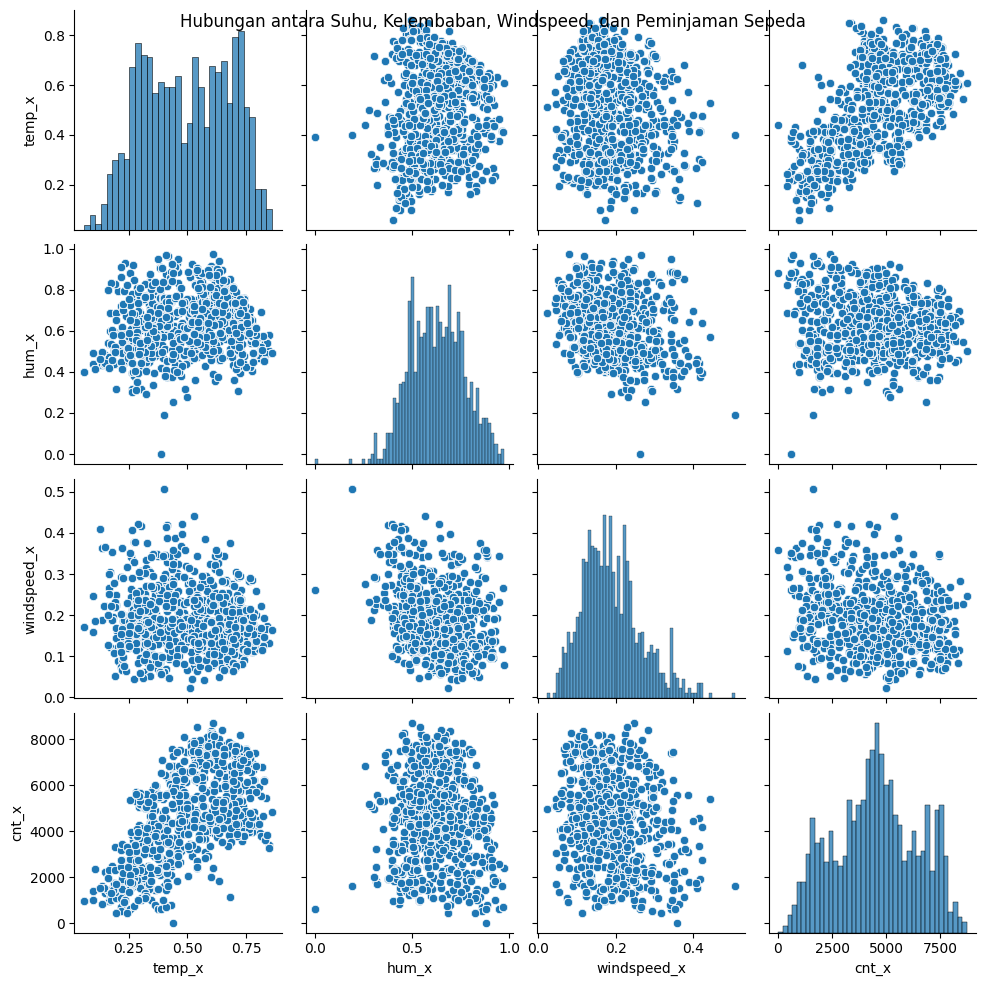

In [ ]:
# Hubungan antara suhu dan jumlah peminjaman sepeda
sns.scatterplot(x='temp_x', y='cnt_x', data=combined_df)
plt.title('Hubungan Suhu dengan Jumlah Peminjaman Sepeda')
plt.xlabel('Suhu')
plt.ylabel('Jumlah Peminjaman Sepeda')
plt.show()

# Hubungan antara kelembaban dan jumlah peminjaman sepeda
sns.scatterplot(x='hum_x', y='cnt_x', data=combined_df)
plt.title('Hubungan Kelembaban dengan Jumlah Peminjaman Sepeda')
plt.xlabel('Kelembaban')
plt.ylabel('Jumlah Peminjaman Sepeda')
plt.show()

# Hubungan antara kecepatan angin dan jumlah peminjaman sepeda
sns.scatterplot(x='windspeed_x', y='cnt_x', data=combined_df)
plt.title('Hubungan Kecepatan Angin dengan Jumlah Peminjaman Sepeda')
plt.xlabel('Kecepatan Angin')
plt.ylabel('Jumlah Peminjaman Sepeda')
plt.show()

# Pairplot untuk semua variabel
sns.pairplot(combined_df[['temp_x', 'hum_x', 'windspeed_x', 'cnt_x']])
plt.suptitle('Pairplot Suhu, Kelembaban, Kecepatan Angin, dan Peminjaman Sepeda')
plt.show()


**Insight:**
* Suhu memiliki hubungan yang signifikan dengan jumlah peminjaman sepeda. Peminjaman sepeda meningkat dengan kenaikan suhu.

* Kelembaban dan kecepatan angin memiliki korelasi yang lebih lemah dengan jumlah peminjaman sepeda.

### **Pertanyaan 2:**
Bagaimana tren jumlah peminjaman sepeda berdasarkan waktu (misalnya, bulan dan hari dalam seminggu)?


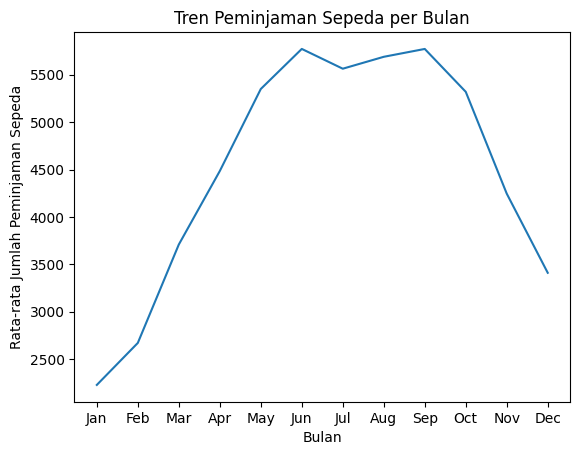

<ipython-input-25-e51be84708a1>:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  daily_avg = combined_df.groupby('weekday_x')['cnt_x'].mean().reset_index()


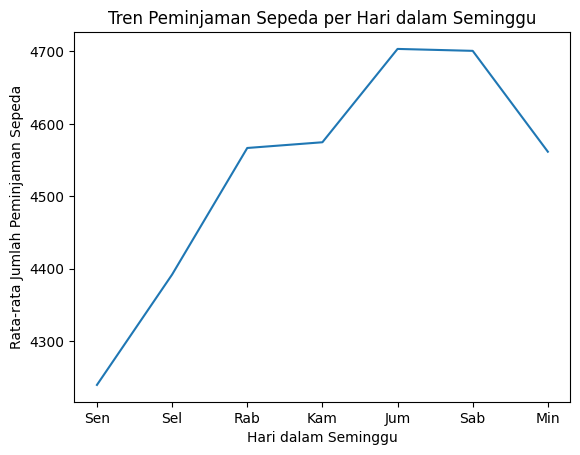

In [ ]:
# Tren peminjaman sepeda berdasarkan bulan
monthly_avg = combined_df.groupby('mnth_x')['cnt_x'].mean().reset_index()
sns.lineplot(x='mnth_x', y='cnt_x', data=monthly_avg)
plt.title('Tren Peminjaman Sepeda per Bulan')
plt.xlabel('Bulan')
plt.ylabel('Rata-rata Jumlah Peminjaman Sepeda')
plt.xticks(ticks=range(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()

# Tren peminjaman sepeda berdasarkan hari dalam seminggu
daily_avg = combined_df.groupby('weekday_x')['cnt_x'].mean().reset_index()
sns.lineplot(x='weekday_x', y='cnt_x', data=daily_avg)
plt.title('Tren Peminjaman Sepeda per Hari dalam Seminggu')
plt.xlabel('Hari dalam Seminggu')
plt.ylabel('Rata-rata Jumlah Peminjaman Sepeda')
plt.xticks(ticks=range(7), labels=['Sen', 'Sel', 'Rab', 'Kam', 'Jum', 'Sab', 'Min'])
plt.show()


**Insight:**
* Peminjaman sepeda cenderung lebih tinggi pada bulan-bulan musim panas, terutama pada bulan Juni hingga Agustus.

* Akhir pekan (Sabtu dan Minggu) cenderung memiliki lebih banyak peminjaman sepeda dibandingkan dengan hari kerja, yang menunjukkan bahwa pengguna lebih aktif di akhir pekan.

## Analisis Lanjutan (Opsional)

### Clustering Berdasarkan Peminjaman Sepeda

     temp_x        cnt_x
0  0.526082  4467.707187
1  0.617532  6916.616956
2  0.310113  2011.738333


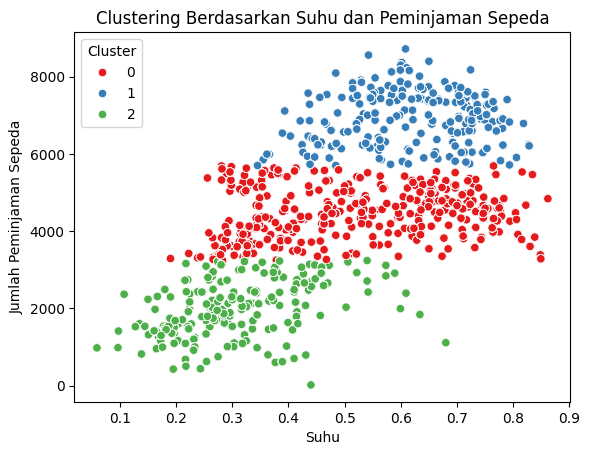

In [ ]:
from sklearn.cluster import KMeans

# Menyiapkan data untuk clustering (variabel numerik)
X = combined_df[['temp_x', 'cnt_x']]

# Menentukan jumlah cluster (misalnya 3)
kmeans = KMeans(n_clusters=3, random_state=0).fit(X)

# Menambahkan kolom 'Cluster' ke dalam dataframe
combined_df['Cluster'] = kmeans.labels_
# Menambahkan penjelasan cluster
cluster_centers = pd.DataFrame(kmeans.cluster_centers_, columns=['temp_x', 'cnt_x'])
print(cluster_centers)


# Visualisasi cluster
sns.scatterplot(x='temp_x', y='cnt_x', hue='Cluster', data=combined_df, palette='Set1')
plt.title('Clustering Berdasarkan Suhu dan Peminjaman Sepeda')
plt.xlabel('Suhu')
plt.ylabel('Jumlah Peminjaman Sepeda')
plt.show()


## Conclusion

### **Kesimpulan**

**Temuan dari Pertanyaan 1:**
1. **Suhu:**
   - Terdapat korelasi yang kuat antara suhu dan jumlah peminjaman sepeda. Peminjaman sepeda meningkat seiring dengan peningkatan suhu.

2. **Kelembaban dan Kecepatan Angin:**
   - Korelasi antara kelembaban dan kecepatan angin dengan jumlah peminjaman sepeda lebih lemah. Kedua variabel ini tidak menunjukkan hubungan yang signifikan dengan permintaan sepeda.

**Temuan dari Pertanyaan 2:**
1. **Tren Musiman:**
   - Peminjaman sepeda lebih tinggi pada bulan-bulan musim panas (Juni hingga Agustus), menunjukkan pola musiman yang dipengaruhi oleh cuaca yang lebih hangat.

2. **Tren Mingguan:**
   - Peminjaman sepeda lebih tinggi pada akhir pekan (Sabtu dan Minggu), yang menunjukkan bahwa pengguna lebih aktif di akhir pekan dibandingkan dengan hari kerja.

**Rekomendasi:**
1. **Peningkatan Armada di Musim Panas:**
   - Mengingat hubungan positif antara suhu dan peminjaman, disarankan untuk meningkatkan jumlah sepeda yang tersedia pada musim panas guna memenuhi permintaan yang lebih tinggi.

2. **Promosi Akhir Pekan:**
   - Menyusun program promosi atau diskon pada akhir pekan untuk meningkatkan peminjaman sepeda selama hari libur, mengingat tingginya permintaan pada waktu tersebut.

**Clustering Insights:**
- Analisis clustering menunjukkan bahwa suhu memainkan peran penting dalam permintaan sepeda. Daerah dengan suhu tinggi cenderung memiliki lebih banyak peminjaman sepeda. Temuan ini dapat digunakan untuk distribusi sepeda yang lebih efisien, terutama di wilayah dengan suhu lebih tinggi.

